In [1]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import seaborn as sb

# Enable inline plotting
%matplotlib inline

In [2]:
adult = pd.read_csv(r'adult.data', header = None)

In [3]:
adult.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                                       'occupation', 'relationship','race', 'sex', 'capital-gain',
                                        'capital-loss','hours-per-week', 'native-country', 'income'  ]

In [4]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
adult.to_csv('adult_clean.data')

In [7]:
pais = adult.groupby("native-country")

In [8]:
pais.median().head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
native-country,,,,,,
?,37.0,182567.0,10.0,0.0,0.0,40.0
Cambodia,37.0,173858.0,9.0,0.0,0.0,40.0
Canada,41.0,174995.0,10.0,0.0,0.0,40.0
China,41.0,160724.0,13.0,0.0,0.0,40.0
Columbia,38.0,201318.0,9.0,0.0,0.0,40.0


In [9]:
adult['native-country'].max()

' Yugoslavia'

In [10]:
adult['age'].max()

90

In [11]:
adult['native-country'].describe()

count              32561
unique                42
top        United-States
freq               29170
Name: native-country, dtype: object

In [12]:
adult.groupby('race')

In [13]:
ageranges = pd.cut(adult['age'], 15)
pd.value_counts(ageranges)

(31.6, 36.467]       4363
(26.733, 31.6]       4264
(36.467, 41.333]     4103
(21.867, 26.733]     4066
(41.333, 46.2]       3745
(16.927, 21.867]     3130
(46.2, 51.0667]      3025
(51.0667, 55.933]    1776
(55.933, 60.8]       1757
(60.8, 65.667]       1174
(65.667, 70.533]      618
(70.533, 75.4]        299
(75.4, 80.267]        142
(80.267, 85.133]       51
(85.133, 90]           48
Name: age, dtype: int64

In [14]:
age = adult.groupby(ageranges)
age.mean().head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,,,,,,
"(16.927, 21.867]",19.272524,197829.121086,8.759425,119.711821,42.938339,29.823323
"(21.867, 26.733]",24.000984,202063.765863,10.086572,267.405804,39.230448,38.411953
"(26.733, 31.6]",29.023452,194073.270638,10.216698,546.796670,74.122889,42.299484
"(31.6, 36.467]",34.032317,194698.629154,10.293147,876.567729,87.361449,43.192757
"(36.467, 41.333]",38.967585,188780.129661,10.493541,1352.414575,107.912747,43.409944


In [15]:
familia = adult.groupby('relationship')
familia.mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
relationship,,,,,,
Husband,43.818616,187074.862503,10.326461,1795.062230,124.160919,44.120139
Not-in-family,38.346057,191131.795304,10.315593,743.327273,75.390728,40.595665
Other-relative,33.164118,205059.821611,8.786952,279.595311,51.332314,37.006116
Own-child,24.827940,193175.408840,9.486188,155.655485,39.511839,33.269337
Unmarried,40.293964,191128.405688,9.642194,455.031050,41.464887,39.103018
Wife,39.846301,181849.507653,10.463010,1659.791454,118.006378,36.861607


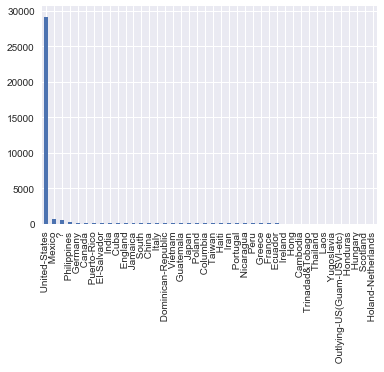

In [16]:
adult['native-country'].value_counts().plot(kind = 'bar')
# Por lo que observamos, Estados Unidos es el país con mas
# participantes en este DataFrame, siendo casi inapreciables
# el resto de países


In [17]:
adult_copy = adult.copy()
def mapCountry():
   
    for i in range(len(adult)):
        
        country = adult["native-country"][i]
    
        if  country ==' United-States' or country ==' Cuba' or pais == ' Mexico'or pais ==' Puerto-Rico' or pais ==' Canada'or pais =='Columbia'or  pais ==' Ecuador'or pais ==' Dominican-Republic'or pais ==' El-Salvador' or country == ' Outlying-US(Guam-USVI-etc)' or country == ' Nicaragua' or country == ' Trinadad&Tobago' or country == ' Peru':
            adult_copy.set_value(i, 'native-country', 'America')
    
        elif country ==' India'or country ==' Taiwan'or country ==' Haiti'or country ==' Japan'or country ==' Hong'or country ==' China'or country ==' Iran'or country ==' Philippines' or country == ' Vietnam':
             adult_copy.set_value(i, 'native-country', 'Asia')
        
        elif country ==' England'or country == ' Germany'or country ==' Italy'or country ==' Poland'or country ==' Portugal'or country ==' France' or country ==' Ireland' or country ==' Greece' or country == ' Hungary' or country == ' Holand-Netherlands' or country == ' Scotland':
                adult_copy.set_value(i, 'native-country', 'Europa')
        else:
            adult_copy.set_value(i, 'native-country', 'Other')

In [18]:
mapCountry()
adult_copy['native-country'].value_counts()

America    29363
Other       2033
Asia         660
Europa       505
Name: native-country, dtype: int64

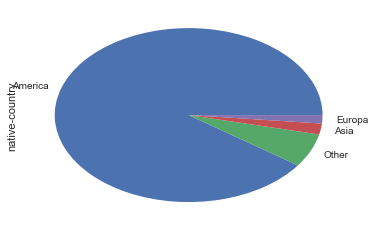

In [19]:
adult_copy['native-country'].value_counts().plot(kind = 'pie')
# Una vez agrupado los paises de procedencia por continentes, 
# sacamos el grafico, donde se observa que la mayoria de los
# participantes provienen de America.

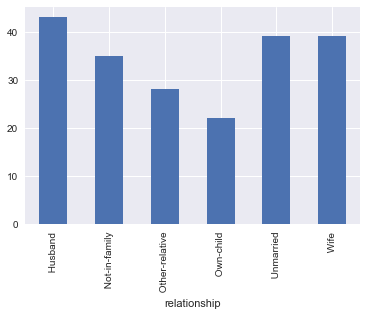

In [20]:
adult.groupby('relationship')['age'].agg(np.median).plot('bar')
# Agrupamos la feature 'Relationship' y calculamos la media
# de edad de cada tipo de relacion, observando que los 'Husband'
# es el tipo de relacion con mayor media de edad superando los 40
# años, seguido con una media muy igualada, de las 'Wife' y los
# 'Unmarried', un poco por debajo de los 40.

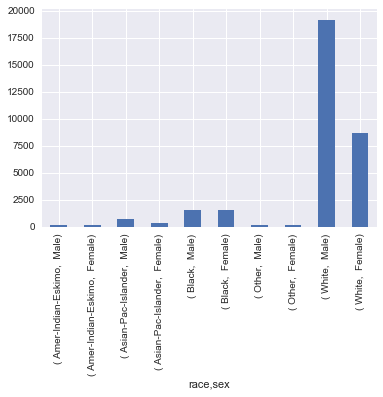

In [21]:
adult.groupby('race')['sex'].value_counts().plot('bar')
# Agrupamos por raza y sexo, y contabilizamos la cantidad
# de cada combinacion raza-sexo. Observamos que predimina
# el hombre y la mujer de raza blanca frente a 


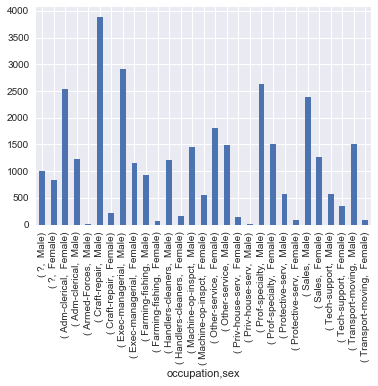

In [22]:
adult.groupby('occupation')['sex'].value_counts().plot('bar')
# Gráfico significativo donde podemos estudiar la cantidad de
# de hombres y mujeres para cada ocupación.

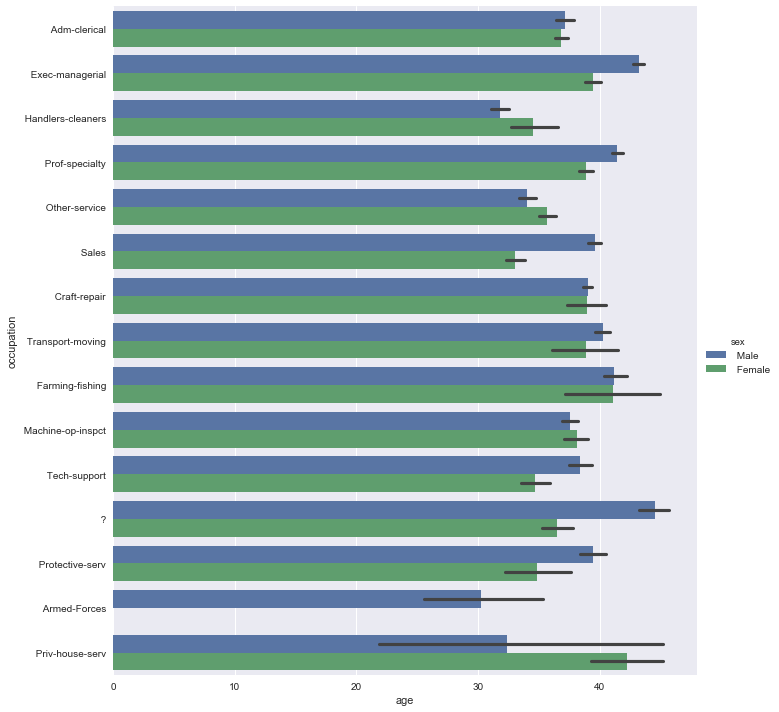

In [23]:
sb.factorplot(x="age", y = 'occupation', hue="sex", data=adult, size=10, kind='bar')
# FactorPlot de la edad de las personas en funcion de los trabajos que ocupan

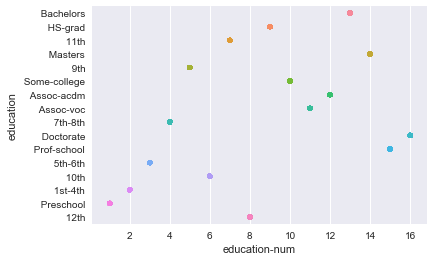

In [24]:
sb.stripplot(x="education-num", y="education", data=adult)
# Este gráfico nos sirve para relacionar el nivel de estudios
# con un parametro tipo int.

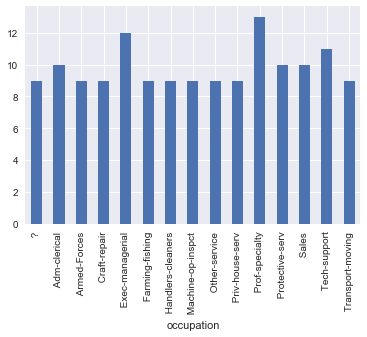

In [25]:
edumean= adult.groupby('occupation')['education-num'].agg(np.median)
# calculamos la media de la agrupacion entre la ocupacion y el nivel de estudios 
# al que pertenecen (explicada la relacion numerica con el grado de estudios en el anterior grafo)
edumean.plot(kind="bar") 
# plasmamos el resultado en un grafo

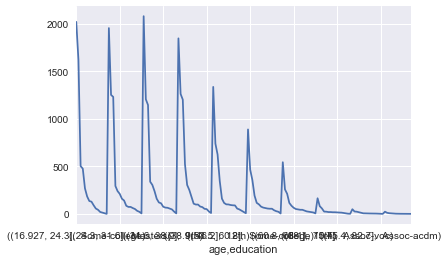

In [26]:
agerange = pd.cut(adult['age'],10)
adult.groupby(agerange)['education'].value_counts().plot(kind='line')
# No se aprecia muy bien, pero es la relacion entre un rango de edades (10 en este caso)
# calculado previamente, con la educacion que han recivido y la cantidad de esta relacion.

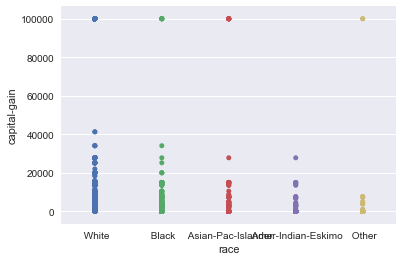

In [27]:
sb.stripplot(x='race', y='capital-gain', data=adult)
# En función de la raza, calculamos el 'capital-gain' 
# de cada uno de ellos

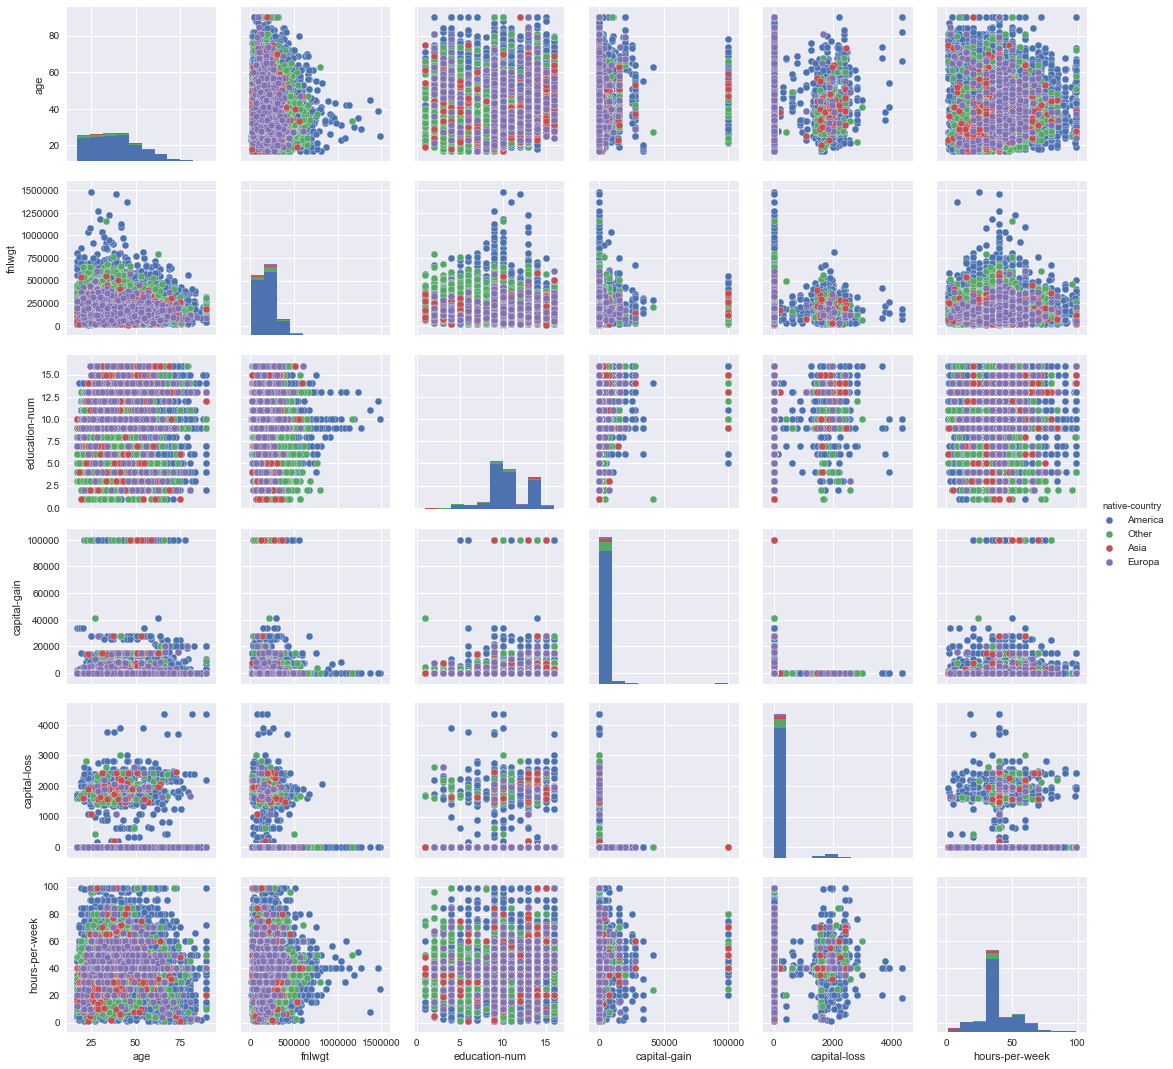

In [28]:
sb.pairplot(adult_copy, hue="native-country")

In [29]:
def mapWorks():
   
    for i in range(len(adult_copy)):
        
        work = adult["workclass"][i]   
          
        if  work == ' Local-gov' or work == ' State-gov' or work == ' Federal-gov':
             adult_copy.set_value(i, 'workclass', 'Government')
        elif work == ' Without-pay' or work == ' Never-worked':
            adult_copy.set_value(i, 'workclass', 'Not-paid')
        elif work == ' Self-emp-not-inc' or work == ' Self-emp-inc':
            adult_copy.set_value(i, 'workclass', 'Self-emp')
        elif work == ' ?':
            adult_copy.set_value(i, 'workclass' , 'Private')
        

In [30]:
mapWorks()
adult_copy['workclass'].value_counts()

 Private      22696
Government     4351
Self-emp       3657
Private        1836
Not-paid         21
Name: workclass, dtype: int64

In [31]:
def mapOccupation():
   
    for i in range(len(adult_copy)):
        
        occu = adult['occupation'][i]
       
        if occu == ' Craft-repair' or occu == ' Transport-moving' or occu == ' Farming-fishing' or occu == ' Handlers-cleaners':
            adult_copy.set_value(i, 'occupation' , 'Hand-Job')
        elif occu == ' Protective-serv' or occu == ' Priv-house-serv' or occu == ' Sales' or occu == ' Armed-Forces':
            adult_copy.set_value(i, 'occupation' , 'Services')
        elif occu == ' Tech-support' or occu == ' Machine-op-inspct' or occu == ' Exec-managerial' or occu == ' Prof-specialty':
            adult_copy.set_value(i, 'occupation' , 'Tech-Proff')
        else: 
               adult_copy.set_value(i, 'occupation' , 'Other')

In [32]:
mapOccupation()
adult_copy['occupation'].value_counts()

Tech-Proff    11136
Other          8908
Hand-Job       8060
Services       4457
Name: occupation, dtype: int64

In [33]:
def mapMarital():
    
    for i in range(len(adult_copy)):
        
        status = adult['marital-status'][i].strip()
        
        if status == 'Married-civ-spouse' or status == 'Married-spouse-absent' or status == 'Married-AF-spouse':
            adult_copy.set_value(i, 'marital-status' , 'Married')
        elif status== 'Divorced' or status == 'Separated' or status == 'Widowed' or status == 'Never-married':
            adult_copy.set_value(i, 'marital-status', 'Not-Married')          

In [34]:
mapMarital()
adult_copy['marital-status'].value_counts()

Not-Married    17144
Married        15417
Name: marital-status, dtype: int64

In [35]:
def mapRace():
    
    for i in range(len(adult_copy)):
        
        race = adult['race'][i].strip()
        
        if race == 'Asian-Pac-Islander' or race == 'Amer-Indian-Eskimo' or race == 'Other':
            adult_copy.set_value(i, 'race', 'Other')

In [36]:
mapRace()
adult_copy['race'].value_counts()

 White    27816
 Black     3124
Other      1621
Name: race, dtype: int64

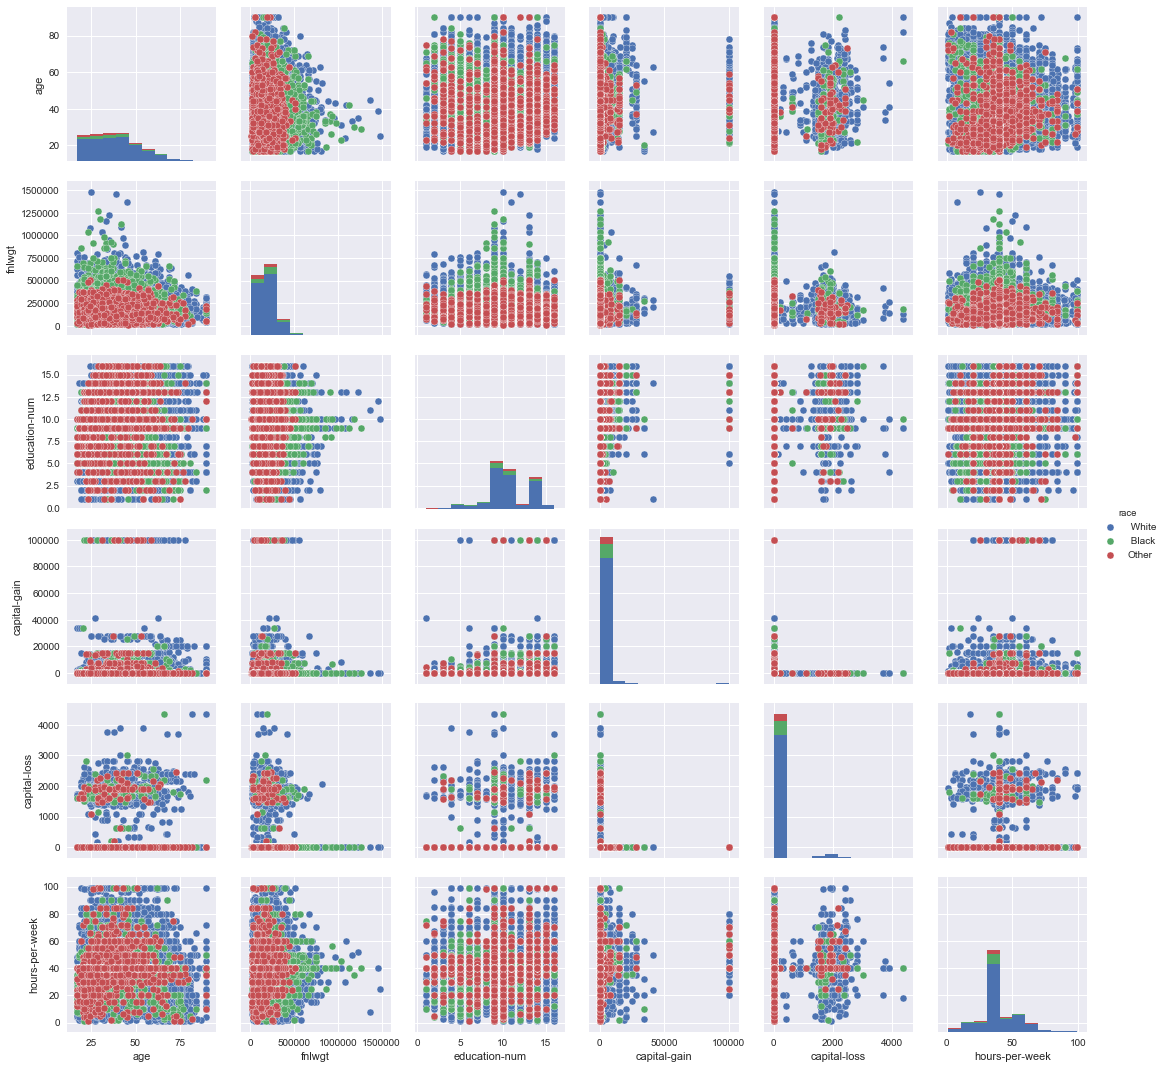

In [37]:
sb.pairplot(adult_copy, hue="race")

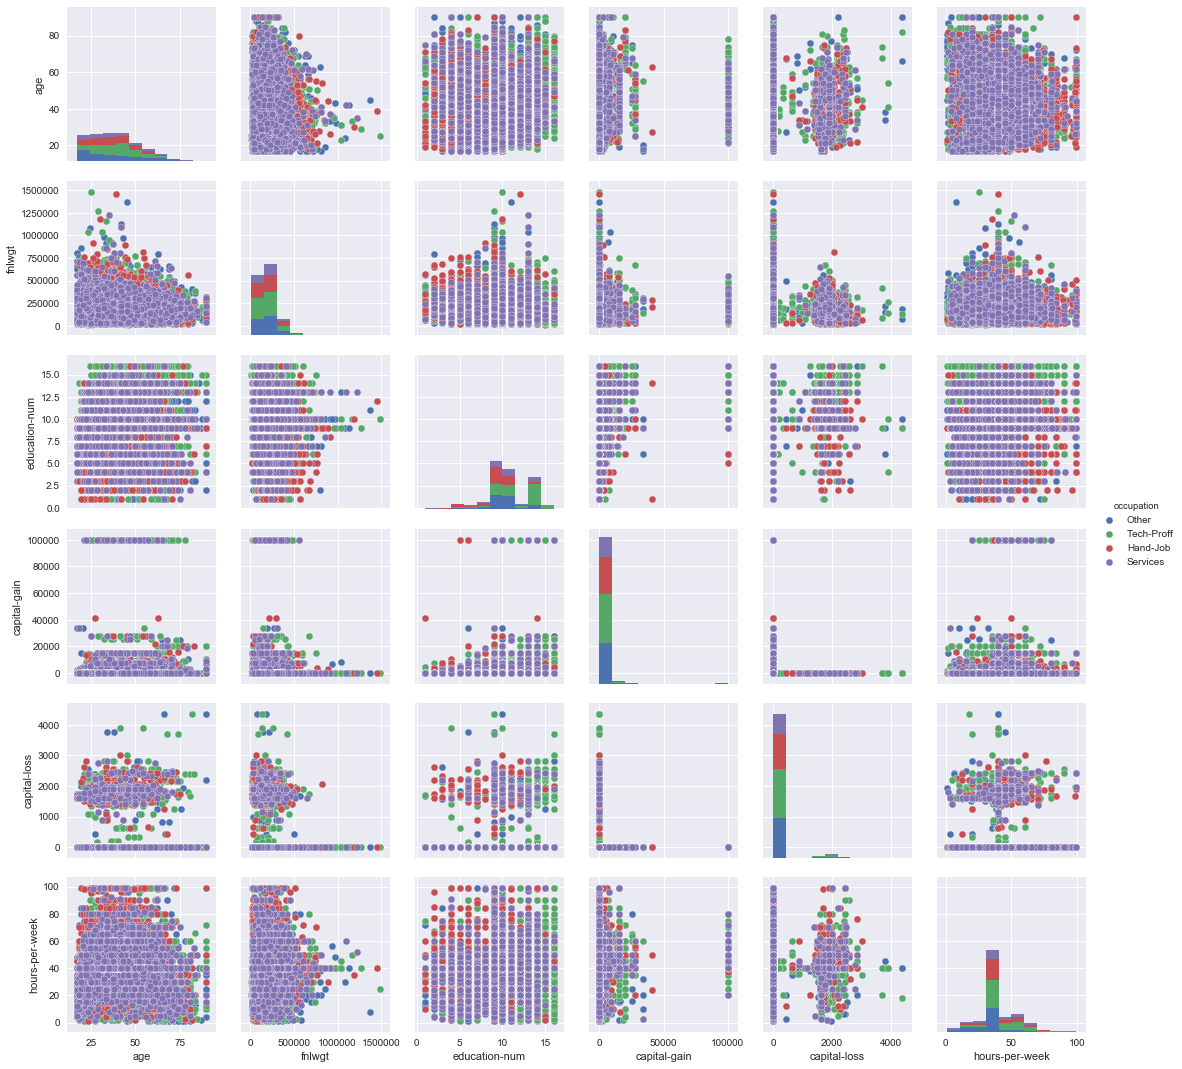

In [38]:
sb.pairplot(adult_copy, hue="occupation")

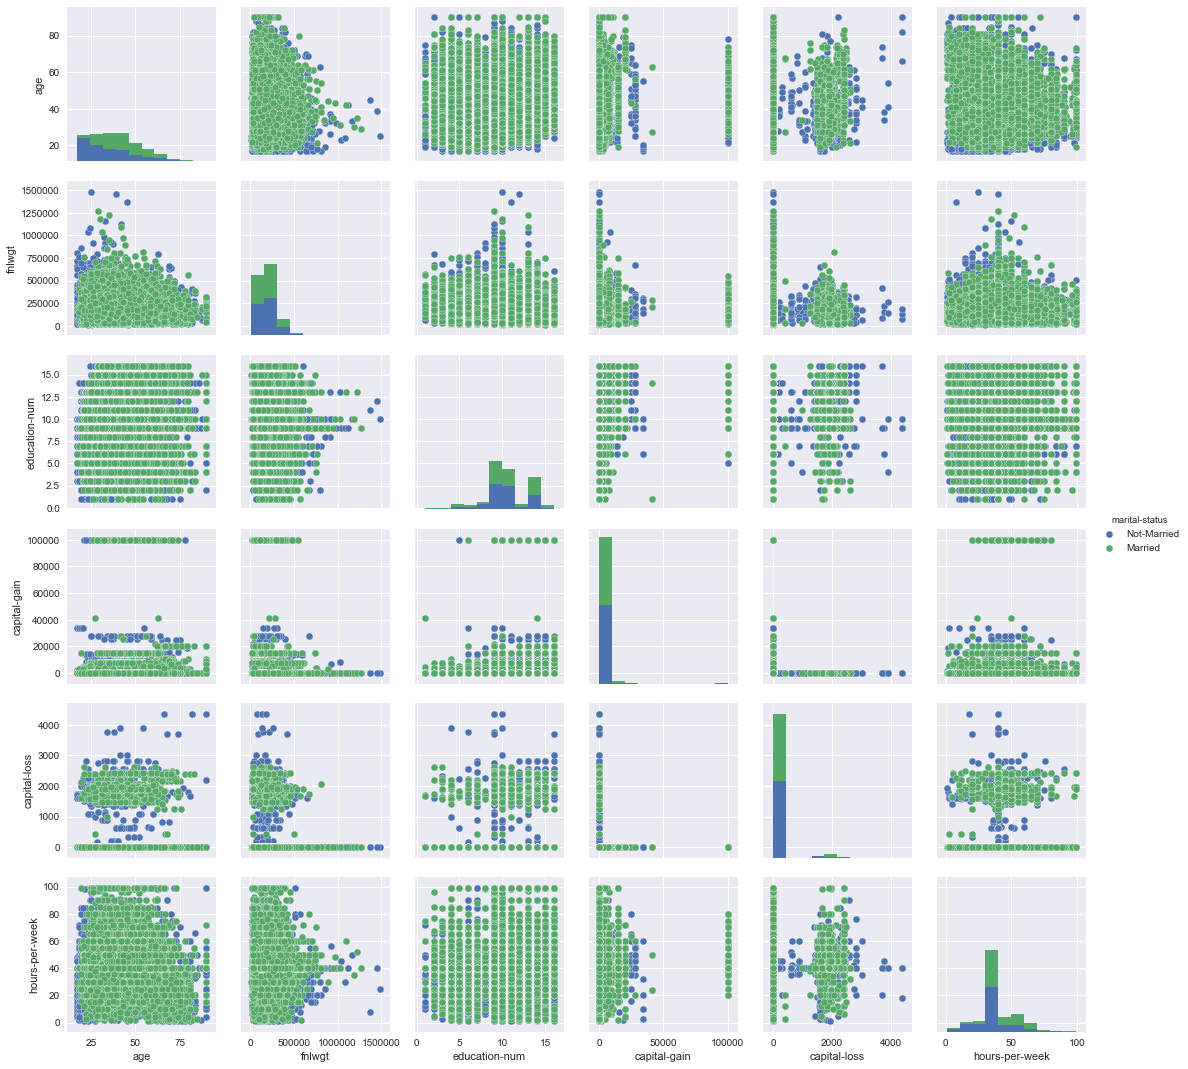

In [39]:
sb.pairplot(adult_copy, hue="marital-status")

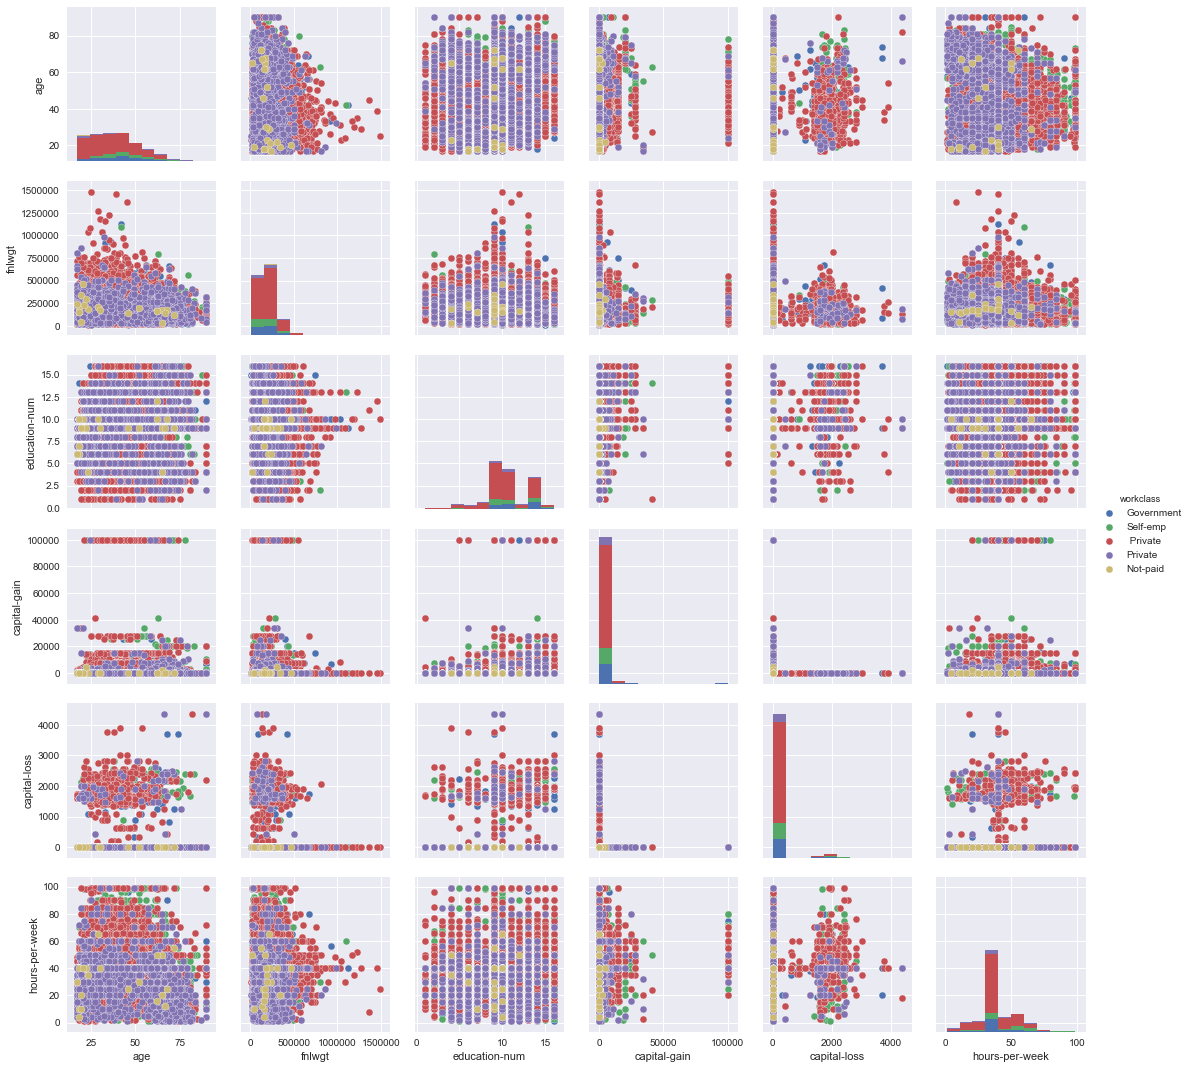

In [40]:
sb.pairplot(adult_copy, hue="workclass")

In [41]:
adult_copy.drop("capital-gain", axis=1, inplace=True,)
adult_copy.drop("capital-loss", axis=1, inplace=True,)


In [42]:
adult_copy.drop("education", axis = 1, inplace=True,)

In [43]:
import sklearn.preprocessing as preprocessing
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [44]:
encoded_data, _ = number_encode_features(adult_copy)

In [45]:
encoded_data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,1,77516,13,1,1,1,1,1,40,0,0
1,50,4,83311,13,0,3,0,1,1,13,0,0
2,38,0,215646,9,1,0,1,1,1,40,0,0
3,53,0,234721,7,0,0,0,0,1,40,0,0
4,28,0,338409,13,0,3,5,0,0,40,0,0


In [46]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [47]:
adult_copy.drop("fnlwgt", axis = 1, inplace=True,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(encoded_data.ix[:, encoded_data.columns != 'income'], encoded_data['income'], train_size=0.50)

In [49]:
#RandomForest
clf = RandomForestClassifier(n_estimators=75,min_samples_split=25, random_state =25, criterion = 'gini')
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
  
scores.mean()

0.83409031800664712